<a href="https://colab.research.google.com/github/Lucca465/dimensionality_reduction_in_big_data/blob/main/pca_reduction_one_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
import os

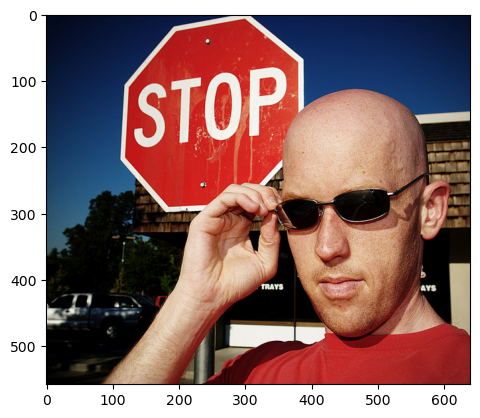

In [ ]:
img = cv2.cvtColor(cv2.imread(r'D:\dataset_images\train2014\COCO_train2014_000000405456.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(558, 640, 3)

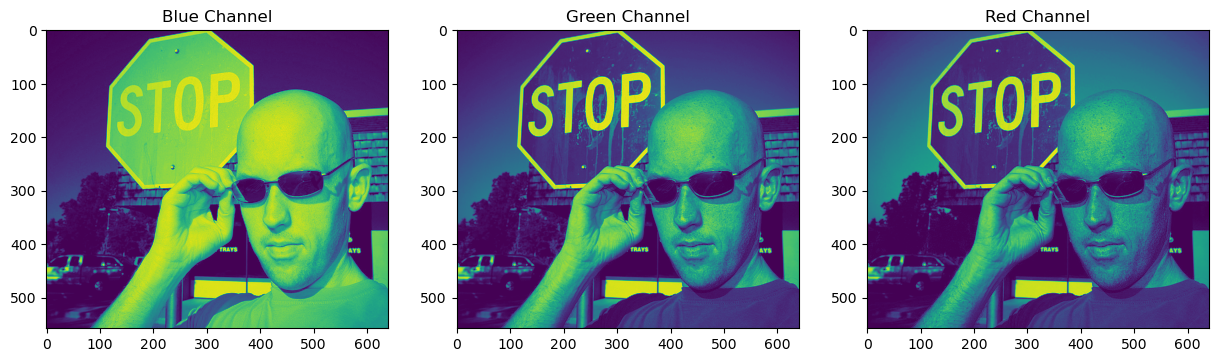

In [ ]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2))
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)

plt.show()

In [ ]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,630,631,632,633,634,635,636,637,638,639
0,7,7,5,5,5,5,4,5,5,4,...,10,10,9,10,10,9,10,10,9,8
1,5,4,4,5,4,2,2,3,2,2,...,6,6,5,6,6,6,6,6,6,5
2,4,4,4,3,3,2,2,2,3,3,...,5,5,5,5,5,5,5,5,4,3
3,2,2,3,3,3,3,3,3,5,4,...,5,4,6,6,5,5,5,5,5,4
4,3,3,3,3,3,3,3,4,4,3,...,6,6,5,5,5,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0,0,0,0,0,0,0,0,0,0,...,142,134,134,137,135,131,124,126,126,131
554,0,0,0,0,0,0,0,0,0,0,...,138,131,141,135,130,131,134,137,131,128
555,0,0,0,0,0,0,0,0,0,0,...,134,142,145,138,134,130,133,134,130,127
556,0,0,0,0,0,0,0,0,0,0,...,140,139,137,136,138,129,125,129,129,130


In [ ]:
df_blue = blue/255
df_green = green/255
df_red = red/255

In [ ]:
pca_b = PCA(n_components=250)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)

pca_g = PCA(n_components=250)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)

pca_r = PCA(n_components=250)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

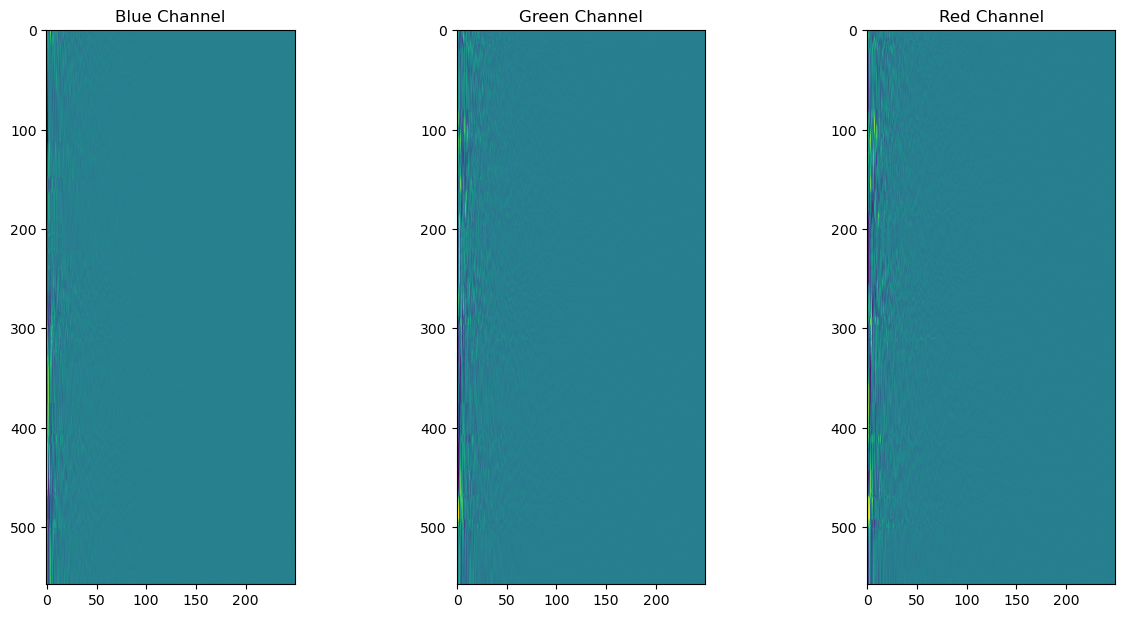

In [ ]:
#Splitting into channels
#blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2))
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(trans_pca_b)

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(trans_pca_g)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(trans_pca_r)

plt.show()

In [ ]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(558, 250)
(558, 250)
(558, 250)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


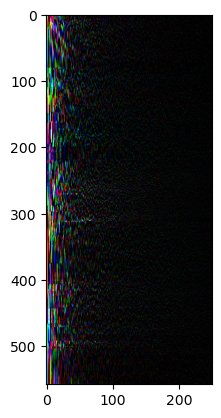

In [ ]:
img_teste = np.zeros((558, 250, 3))

img_teste[:,:,0] = trans_pca_b
img_teste[:,:,1] = trans_pca_r
img_teste[:,:,2] = trans_pca_g

plt.imshow(img_teste)
plt.show()

In [ ]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9776092770333359
Green Channel: 0.9616994114599625
Red Channel  : 0.9595496826239381


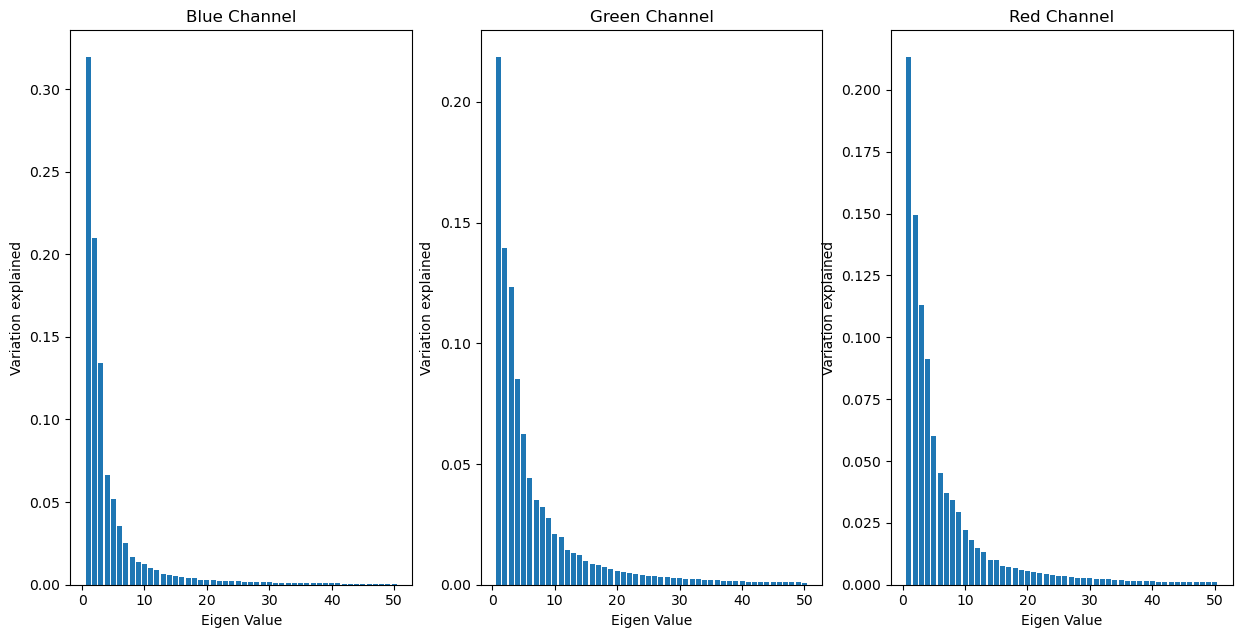

In [ ]:
fig = plt.figure(figsize = (15, 7.2))
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)

fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)

fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)

plt.show()

In [ ]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(558, 640) (558, 640) (558, 640)


In [ ]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(558, 640, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


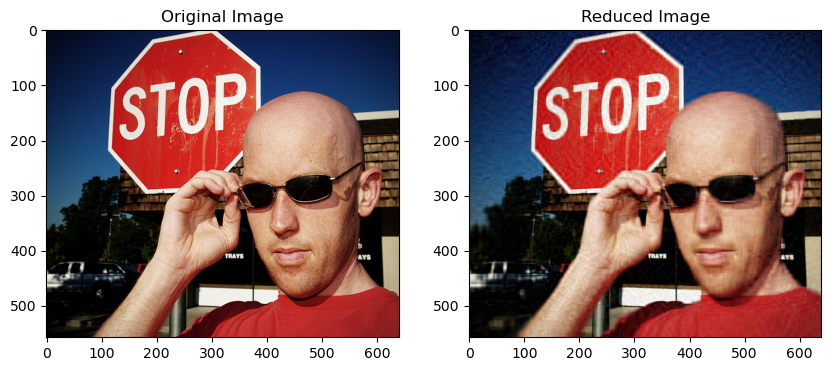

In [ ]:
fig = plt.figure(figsize = (10, 7.2))

fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)

plt.show()

In [ ]:
cv2.imwrite(r"D:\dataset_images\imagem_reduzida.jpg", img_reduced)

True

In [ ]:
cv2.imwrite(r"D:\dataset_images\imagem.jpg", img)

True

In [ ]:
size_KB_img = img.shape[0] * img.shape[1]
print(f"Tamanho da imagem original: {size_KB_img} pixels")

size_KB_img_reduced = img_reduced.shape[0] * img_reduced.shape[1]
print(f"Tamanho da imagem reduzida: {size_KB_img_reduced} pixels")

Tamanho da imagem original: 357120 pixels
Tamanho da imagem reduzida: 357120 pixels


In [ ]:
# Codificar a imagem original em formato JPEG e obter o tamanho em bytes
_, img_original_encoded = cv2.imencode(".jpg", img)
tamanho_img_original_kb = len(img_original_encoded) / 1024  # Converter bytes para kilobytes

# Codificar a imagem reduzida em formato JPEG e obter o tamanho em bytes
_, img_reduzida_encoded = cv2.imencode(".jpg", img_reduced)
tamanho_img_reduzida_kb = len(img_reduzida_encoded) / 1024  # Converter bytes para kilobytes

print(f"Tamanho da imagem original: {tamanho_img_original_kb:.2f} KB")
print(f"Tamanho da imagem reduzida: {tamanho_img_reduzida_kb:.2f} KB")

Tamanho da imagem original: 151.71 KB
Tamanho da imagem reduzida: 9.22 KB
